In [4]:
import scraping_class
logfile = 'log.txt'## name your log file.
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [5]:
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [6]:
with open('df_final-COPY1.pkl', 'rb') as f:
    df = pickle.load(f)

## Defining function to look into statistics

In [7]:
def tlen(name):
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_value = []
    tlen_share = []
    for i in df[name].unique():
        tlen_id.append(i)
        tlen_value.append(len(df.loc[df[name] == i]))
        
    for i in df[name].unique():
        tlen_share.append((len(df.loc[df[name] == i])/sum(tlen_value)*100))
        
    tlen_id.append('Total')
    tlen_value.append(sum(tlen_value))
    tlen_share.append(sum(tlen_share))
        
        
    tlen['Id'] = tlen_id
    tlen['Value'] = tlen_value
    tlen['Share %'] = tlen_share
        
    return(tlen.sort_values('Value',ascending=True))

In [8]:
def tlen_year(name,year):
    df1 = df[df['Year'] == year]
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_value = []
    tlen_share = []
    for i in df[name].unique():
        tlen_id.append(i)
        tlen_value.append(len(df1.loc[df[name] == i]))
    
    for i in df[name].unique():
        tlen_share.append((len(df1.loc[df[name] == i])/sum(tlen_value)*100))
        
    tlen_id.append('Total')
    tlen_value.append(sum(tlen_value))
    tlen_share.append(sum(tlen_share))
        
    tlen['Id'] = tlen_id
    tlen['Value'] = tlen_value
    tlen['Share %'] = tlen_share
        
    return(tlen.sort_values('Value',ascending=True))

In [9]:
def tlen_byyear(name):
    
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_1314 = []
    tlen_1415 = []
    tlen_1516 = []
    tlen_1617 = []
    tlen_1718 = []

    for i in df[name].unique():
        tlen_id.append(i)
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314.append(len(df1.loc[df[name] == i]))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415.append(len(df2.loc[df[name] == i]))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516.append(len(df3.loc[df[name] == i]))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617.append(len(df4.loc[df[name] == i]))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718.append(len(df5.loc[df[name] == i]))
    
    
        
    tlen_id.append('Total')
    tlen_1314.append(sum(tlen_1314))
    tlen_1415.append(sum(tlen_1415))
    tlen_1516.append(sum(tlen_1516))
    tlen_1617.append(sum(tlen_1617))
    tlen_1718.append(sum(tlen_1718))
    
        
    tlen['Id'] = tlen_id
    tlen['2013-2014'] = tlen_1314
    tlen['2014-2015'] = tlen_1415
    tlen['2015-2016'] = tlen_1516
    tlen['2016-2017'] = tlen_1617
    tlen['2017-2018'] = tlen_1718
        
    return(tlen)

In [10]:
def tlen_byyear_share(name):
    
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_1314 = []
    tlen_1415 = []
    tlen_1516 = []
    tlen_1617 = []
    tlen_1718 = []
    tlen_1314s = []
    tlen_1415s = []
    tlen_1516s = []
    tlen_1617s = []
    tlen_1718s = []

    for i in df[name].unique():
        tlen_id.append(i)
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314.append(len(df1.loc[df[name] == i]))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415.append(len(df2.loc[df[name] == i]))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516.append(len(df3.loc[df[name] == i]))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617.append(len(df4.loc[df[name] == i]))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718.append(len(df5.loc[df[name] == i]))
    
    for i in df[name].unique():
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314s.append(len(df1.loc[df[name] == i])/sum(tlen_1314))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415s.append(len(df2.loc[df[name] == i])/sum(tlen_1415))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516s.append(len(df3.loc[df[name] == i])/sum(tlen_1516))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617s.append(len(df4.loc[df[name] == i])/sum(tlen_1617))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718s.append(len(df5.loc[df[name] == i])/sum(tlen_1718))
        
    tlen['Id'] = tlen_id
    tlen['2013-2014'] = tlen_1314s
    tlen['2014-2015'] = tlen_1415s
    tlen['2015-2016'] = tlen_1516s
    tlen['2016-2017'] = tlen_1617s
    tlen['2017-2018'] = tlen_1718s
        
    return(tlen)

In [97]:
def tlen_bygroup(var, group):
    my_dict = {}
    list_id = []
    for i in df[var].unique():
        list_id.append(i)
        for k in df[group].unique():
            list_value = []
            df1 = df[df[var] == i]
            list_value.append(len(df1.loc[df[group] == k]))
            my_dict[k] = list_value
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T)
        
            

In [98]:
tlen_bygroup('Fakultet','Year')

,2014-2015,2017-2018,2016-2017,2015-2016,2013-2014,ID
0,82,87,86,83,35,Det Natur- og Biovidenskabelige Fakultet
1,None,None,None,None,None,Det Samfundsvidenskabelige Fakultet
2,None,None,None,None,None,Det Humanistiske Fakultet
3,None,None,None,None,None,Det Sundhedsvidenskabelige Fakultet
4,None,None,None,None,None,Det Juridiske Fakultet
5,None,None,None,None,None,Det Teologiske Fakultet


In [74]:
tlen_byyear('Fakultet')

,Id,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018
0,Det Natur- og Biovidenskabelige Fakultet,519,1161,1205,1185,1207
1,Det Samfundsvidenskabelige Fakultet,225,456,534,497,513
2,Det Humanistiske Fakultet,212,421,758,341,244
3,Det Sundhedsvidenskabelige Fakultet,238,651,637,672,671
4,Det Juridiske Fakultet,117,269,310,288,280
5,Det Teologiske Fakultet,35,82,83,86,87
6,Total,1346,3040,3527,3069,3002


In [11]:


df_nocen = df[df['Censorship form_edit'] == 'No external censorship']
df_cen = df[df['Censorship form_edit'] == 'External censorship']
print(pd.to_numeric(df_cen['Eksamensgennemsnit']).describe(), pd.to_numeric(df_nocen['Eksamensgennemsnit']).describe())



count    5144.000000
mean        6.634512
std         2.337830
min        -1.500000
25%         5.041054
50%         6.963850
75%         8.436648
max        12.000000
Name: Eksamensgennemsnit, dtype: float64 count    5536.000000
mean        7.189222
std         2.245170
min        -3.000000
25%         5.805926
50%         7.483249
75%         8.840227
max        12.000000
Name: Eksamensgennemsnit, dtype: float64


# Descriptive statistic - diving in to the weirds of the data
## Years
It is seen from `tlen('year')` that there a many fewer eksamns in the study year 2013-2014 than the rest. By looking at `tlen_year('Termin','2013-2014')` it is seen that only the summer eksamns are in this year. By going to the grade web-page it is seen that it only tracks data to summer 14, and therefore eksamns from winter 13 not included.

It is seen that apparently 2015-2016 has around 500 more eksamns than both the year before and the year after. Most of them are from HUM as seen in `tlen_byyear('Fakultet')`. F.eks. TORS has 150 in 2015-2016 and suddenly 1 in 2016-2017. It seems like 2015-2016 as seen by `tlen_byyear('Institut')` maybe there where an extra focus on doing statistics in 2016-2017. This hypothesis is backed up by `tlen_byyear('Censorship form_edit')` where the rise is shown in nan. I.E the courses where the info on the exam is limited.

An Interesting fact from `tlen_byyear('Censorship form_edit')` is that no external is rising whil external is falling.

## Output:

#### Table. Disribution of year and Fakultet

In [13]:
print(tlen_byyear('Fakultet').to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
                                       Id &  2013-2014 &  2014-2015 &  2015-2016 &  2016-2017 &  2017-2018 \\
\midrule
 Det Natur- og Biovidenskabelige Fakultet &        519 &       1161 &       1205 &       1185 &       1207 \\
      Det Samfundsvidenskabelige Fakultet &        225 &        456 &        534 &        497 &        513 \\
                Det Humanistiske Fakultet &        212 &        421 &        758 &        341 &        244 \\
      Det Sundhedsvidenskabelige Fakultet &        238 &        651 &        637 &        672 &        671 \\
                   Det Juridiske Fakultet &        117 &        269 &        310 &        288 &        280 \\
                  Det Teologiske Fakultet &         35 &         82 &         83 &         86 &         87 \\
                                    Total &       1346 &       3040 &       3527 &       3069 &       3002 \\
\bottomrule
\end{tabular}



#### List of categories we've made

In [30]:
cat_list = ['Aid_edit', 'Marking scale_edit', 'Censorship form_edit', 'Duration_edit', 'Language_edit', 'Type of assessmet_edit']
di = {}
list_1 = []
for i in cat_list:
    list_1 = []
    for k in df[i].unique():
        list_1.append(k)
    di[i]=list_1
print(pd.DataFrame.from_dict(di, orient='index').T.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
                  Aid\_edit &       Marking scale\_edit &    Censorship form\_edit &        Duration\_edit & Language\_edit &            Type of assessmet\_edit \\
\midrule
                       nan &    7-point grading scale &  No external censorship &              1 block &       English &    Continuous assessment not exam \\
          All aids allowed &                      nan &     External censorship &           1 semester &        Danish &                              Oral \\
 Only certain aids allowed &        passed/not passed &                     nan &  Other/Not specified &         Other &    Written not under invigilation \\
      Written aids allowed &  completed/not completed &                    None &             2 blocks &          None &                         Portfolio \\
              Without aids &       Without assessment &                    None &                 None &          None &        Written under invigilation \\
    

In [69]:
df_nocen = df[df['Censorship form_edit'] == 'No external censorship']
df_cen = df[df['Censorship form_edit'] == 'External censorship']
print(pd.to_numeric(df_cen['Eksamensgennemsnit']).describe(), '\n ', pd.to_numeric(df_nocen['Eksamensgennemsnit']).describe())


count    5144.000000
mean        6.634512
std         2.337830
min        -1.500000
25%         5.041054
50%         6.963850
75%         8.436648
max        12.000000
Name: Eksamensgennemsnit, dtype: float64 
  count    5536.000000
mean        7.189222
std         2.245170
min        -3.000000
25%         5.805926
50%         7.483249
75%         8.840227
max        12.000000
Name: Eksamensgennemsnit, dtype: float64


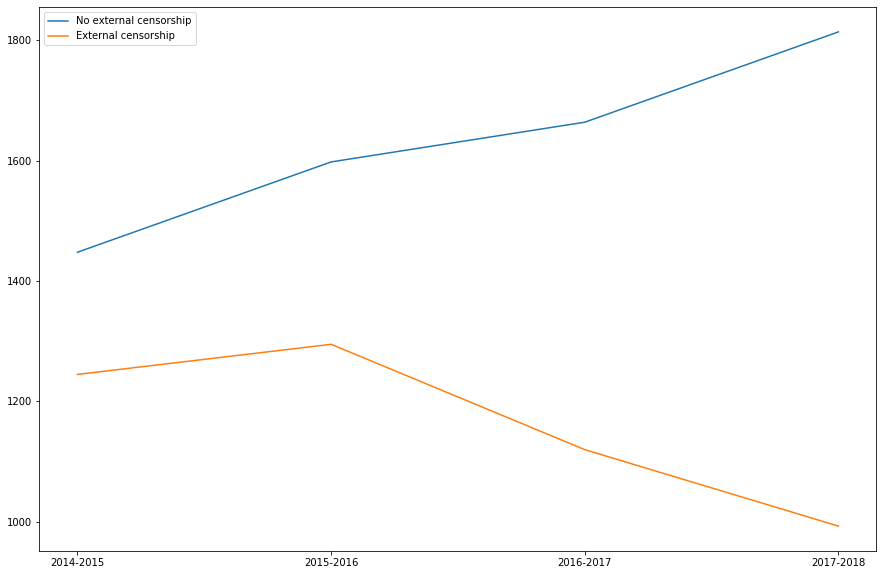

In [32]:
f, axs = plt.subplots(figsize=(15,10))
graph_df = tlen_byyear('Censorship form_edit').set_index('Id').T.reset_index()


for i in list(graph_df.columns.unique()[1:-2]):
    plt.plot(graph_df['index'][1:],graph_df[i][1:],label = i)

plt.legend(loc='best')
plt.show()


In [113]:
tlen_byyear_share('Censorship form_edit')

,Id,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018
0,No external censorship,0.447994,0.476316,0.453076,0.542196,0.604264
1,External censorship,0.406389,0.409539,0.367168,0.364940,0.330779
2,nan,0.145617,0.114145,0.179756,0.092864,0.064957


In [39]:
list(df.columns.unique())

['Kursus',
 'Fakultet',
 'Institut',
 'Termin',
 'ECTS',
 'Eksamenstype',
 'Antal tilmeldte',
 'Fremmødte',
 'Antal bestået',
 'Eksamensgennemsnit',
 12,
 10,
 7,
 4,
 2,
 0,
 -3,
 'Ej mødt',
 'Ikke bestået',
 'Year',
 'ID',
 'Re-exam_dummy',
 'URL_E',
 'level_0',
 'Course Name',
 'Credit',
 'Type of assessment',
 'Aid',
 'Marking scale',
 'Censorship form',
 'Exam period',
 'Re-exam',
 'Language',
 'Course code',
 'Level',
 'Duration',
 'Placement',
 'Schedule',
 'Study board',
 'Course id',
 'Category',
 'Lectures',
 'Preparation',
 'Exam',
 'Total',
 'Content',
 'Learning\r\nOutcome',
 'Class Instruction',
 'Practical exercises',
 'Exam registration requirements',
 'Field Work',
 'Course capacity',
 'Seminar',
 'Guidance',
 'Continuing and further education',
 'Price',
 'Class Seminar',
 'Class Exercises',
 'Study Groups',
 'Exercises',
 'Exam Preparation',
 'Excursions',
 'Øvelseshold',
 'Øvelser',
 'Course Preparation',
 'Theory exercises',
 'Project work',
 'Clinical practice',
 

In [43]:
tlen_byyear('Type of assessmet_edit')

,Id,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018
0,Continuous assessment not exam,52,123,118,111,112
1,Oral,344,780,841,775,751
2,Written not under invigilation,320,767,927,830,854
3,Portfolio,23,69,87,95,117
4,Written under invigilation,336,827,807,780,752
5,Practical,20,38,43,33,36
6,Course participation written,52,66,59,61,54
7,Course participation not written,13,45,77,93,117
8,Continuous assessment exam,23,55,57,50,52
9,Other,163,270,511,241,157


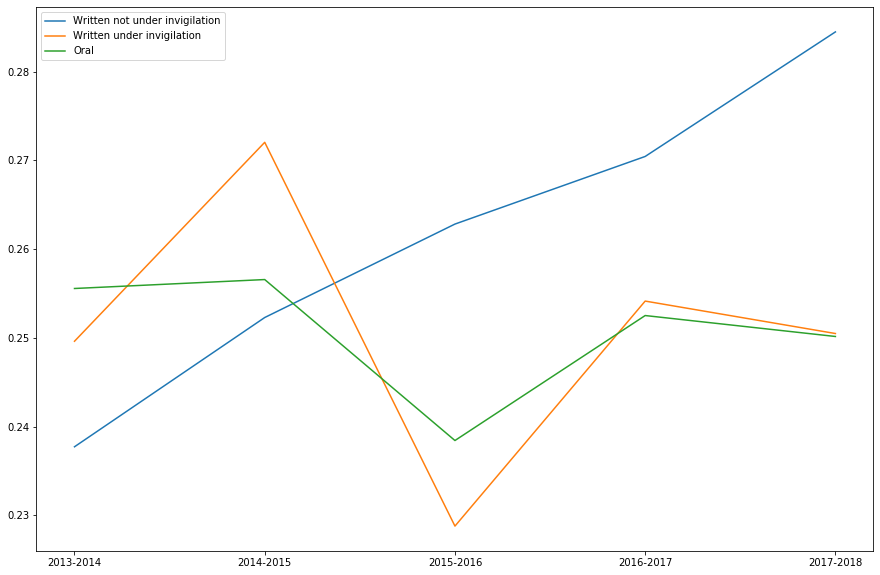

In [53]:
f, axs = plt.subplots(figsize=(15,10))
graph_df = tlen_byyear_share('Type of assessmet_edit').set_index('Id').T.reset_index()



for i in ['Written not under invigilation', 'Written under invigilation', 'Oral' ]:
    plt.plot(graph_df['index'][0:],graph_df[i][0:],label = i)

plt.legend(loc='best')
plt.show()


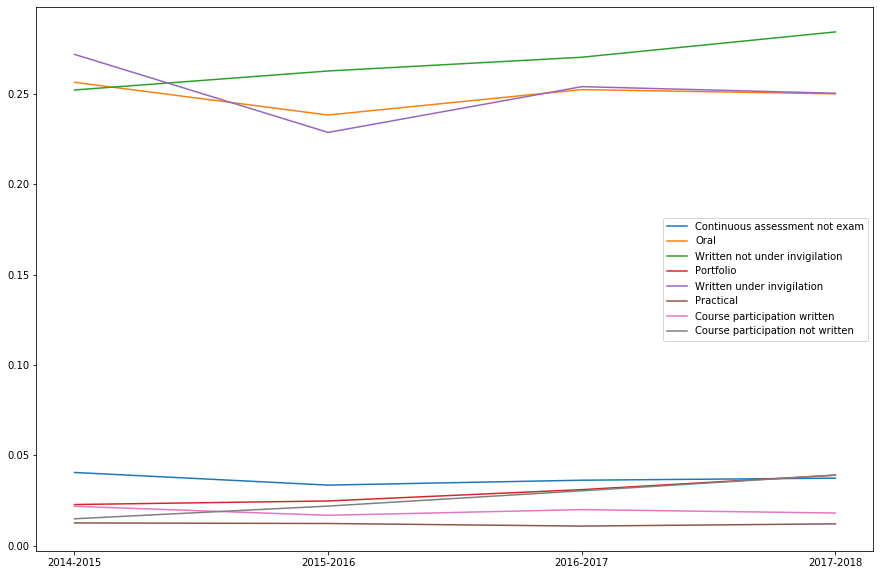

In [49]:
f, axs = plt.subplots(figsize=(15,10))
graph_df = tlen_byyear_share('Type of assessmet_edit').set_index('Id').T.reset_index()


for i in list(graph_df.columns.unique()[1:-2]):
    plt.plot(graph_df['index'][1:],graph_df[i][1:],label = i)

plt.legend(loc='best')
plt.show()



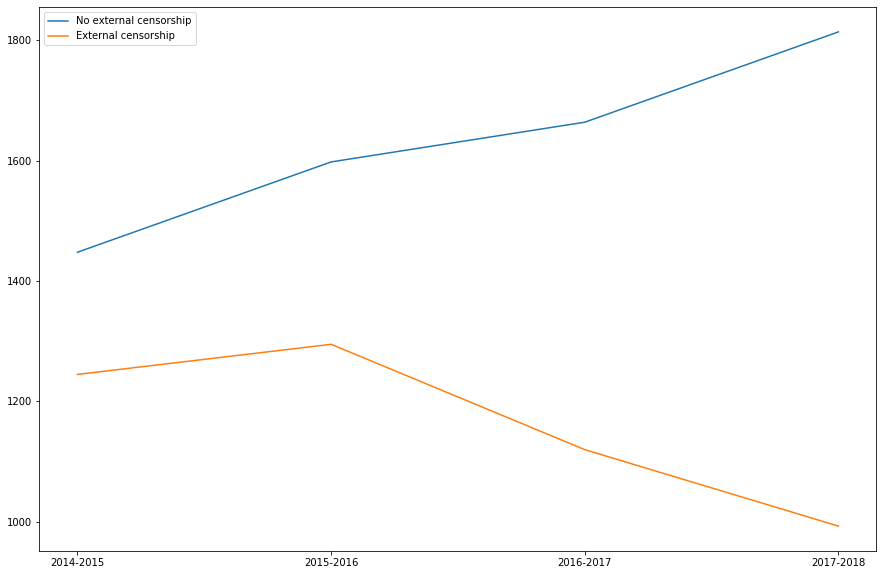

In [36]:
f, axs = plt.subplots(figsize=(15,10))
tlen_byyear('Censorship form_edit').set_index('Id')
graph_df = tlen_byyear('Censorship form_edit').set_index('Id').T.reset_index()


for i in list(graph_df.columns.unique()[1:-2]):
    plt.plot(graph_df['index'][1:],graph_df[i][1:],label = i)

plt.legend(loc='best')
plt.show()



In [117]:
with open('df_final_outer-Copy1.pkl', 'rb') as f:
    dfo = pickle.load(f)

In [122]:
dfo[dfo['Year'] == '2013-2014']

,Kursus,Fakultet,Institut,Termin,ECTS,Eksamenstype,Antal tilmeldte,Fremmødte,Antal bestået,Eksamensgennemsnit,...,Colloquia_edit,Laboratory_edit,E-Learning_edit,Practical Training_edit,Praksishold_edit,Tutoring_edit,Manuduktion_edit,Language_edit,Type of assessmet_edit,URL_C
21,§3 i praksis - Naturbeskyttelsesloven,Det Natur- og Biovidenskabelige Fakultet,Institut for Geovidenskab og Naturforvaltning,s14/B5,5,Ordinær eksamen,12,12,12,9.16667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Danish,Portfolio,https://kurser.ku.dk/archive/2013-2014/course/...
27,1. årsprojekt,Det Sundhedsvidenskabelige Fakultet,Folkesundhedsvidenskab,s14,15,Ordinær eksamen,59,59,59,9.40678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1.årsprojekt,Det Humanistiske Fakultet,"Institut for Medier, Erkendelse og Formidling",s14,75,Ordinær eksamen,64,60,60,7.16667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,20. århundredes filosofi,Det Humanistiske Fakultet,"Institut for Medier, Erkendelse og Formidling",s14,15,Ordinær eksamen,69,67,59,6.08955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,306. Masterprojekt,Det Humanistiske Fakultet,"Institut for Medier, Erkendelse og Formidling",s14,15,Ordinær eksamen,9,9,9,9.44444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,5. CCP1 Danish Culture,Det Humanistiske Fakultet,"Saxo-Instituttet - Arkæologi, Etnologi, Histor...",s14,75,Ordinær eksamen,97,97,89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,6. CCP2 Danish Culture,Det Humanistiske Fakultet,"Saxo-Instituttet - Arkæologi, Etnologi, Histor...",s14,75,Ordinær eksamen,45,39,37,8.66667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,7. CCP3 Danish Culture,Det Humanistiske Fakultet,"Saxo-Instituttet - Arkæologi, Etnologi, Histor...",s14,15,Ordinær eksamen,11,10,10,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,8. CCP4A Intensive Course in Danish Culture,Det Humanistiske Fakultet,"Saxo-Instituttet - Arkæologi, Etnologi, Histor...",s14,15,Ordinær eksamen,37,31,27,7.58065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,English,Written not under invigilation,https://kurser.ku.dk/archive/2013-2014/course/...
44,8. CCP4C Intensive Course in Danish Culture,Det Humanistiske Fakultet,"Saxo-Instituttet - Arkæologi, Etnologi, Histor...",s14,15,Ordinær eksamen,45,44,44,9.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,English,Written not under invigilation,https://kurser.ku.dk/archive/2013-2014/course/...


In [161]:
dfo[dfo['URL_E'] == 'http://karakterstatistik.stads.ku.dk/Histogram/HEEK03471E/Summer-2018' ][]

,Kursus,Fakultet,Institut,Termin,ECTS,Eksamenstype,Antal tilmeldte,Fremmødte,Antal bestået,Eksamensgennemsnit,...,Colloquia_edit,Laboratory_edit,E-Learning_edit,Practical Training_edit,Praksishold_edit,Tutoring_edit,Manuduktion_edit,Language_edit,Type of assessmet_edit,URL_C
13307,Kultur og historie,Det Humanistiske Fakultet,"Saxo-Instituttet - Arkæologi, Etnologi, Histor...",s18,15,Ordinær eksamen,19,17,15,8.70588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
